In [1]:
import numpy as np
import pandas as pd

In [3]:
Sheets=pd.read_excel("Sample Survey.xlsx",
                   sheet_name=["Data"])
Sheets

{'Data':       response_id collection_date urban_rural               education  \
 0               1      2020-08-24       Rural               12th Pass   
 1               2      2020-08-24       Rural                Graduate   
 2               3      2020-08-24       Rural                Graduate   
 3               4      2020-08-24       Urban                Graduate   
 4               5      2020-08-24       Rural                Graduate   
 ...           ...             ...         ...                     ...   
 6862         6863      2020-09-01       Rural               10th Pass   
 6863         6864      2020-09-01       Rural                Graduate   
 6864         6865      2020-09-01       Urban                Graduate   
 6865         6866      2020-09-01       Rural  Professional Education   
 6866         6867      2020-09-01       Rural               10th Pass   
 
                    income Vote_Now     Past_Vote     CM_satisfaction  \
 0     ₹ 30,000 - ₹ 50,000   

### 1. Load the dataset into a pandas dataframe. Name the variable as "survey".

In [4]:
survey=pd.concat(Sheets[frame] for frame in Sheets.keys())
survey

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight
0,1,2020-08-24,Rural,12th Pass,"₹ 30,000 - ₹ 50,000",BJP,BJP,Fully Dissatisfied,Fully Dissatisfied,26,Male,211,Gen,0.346969
1,2,2020-08-24,Rural,Graduate,"₹ 20,000 - ₹ 30,000",RLSP,JD(U),Somewhat Satisfied,Fully Dissatisfied,34,Male,189,BC,0.603419
2,3,2020-08-24,Rural,Graduate,"₹ 5,000 - ₹ 10,000",JAP(L),BJP,Fully Dissatisfied,Somewhat Satisfied,25,Male,191,Gen,0.673762
3,4,2020-08-24,Urban,Graduate,"₹ 10,000 - ₹ 20,000",RJD,RJD,Fully Dissatisfied,Somewhat Satisfied,36,Male,194,Gen,1.101298
4,5,2020-08-24,Rural,Graduate,"₹ 50,000 - ₹ 80,000",JD(U),Did not vote,Fully Satisfied,Fully Satisfied,22,Male,176,BC,0.333505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6862,6863,2020-09-01,Rural,10th Pass,"BPL/Below ₹ 5,000",JD(U),BJP,Fully Satisfied,Fully Dissatisfied,25,Male,166,Gen,0.036329
6863,6864,2020-09-01,Rural,Graduate,"BPL/Below ₹ 5,000",RJD,RJD,Fully Dissatisfied,Fully Dissatisfied,30,Male,169,BC,0.252780
6864,6865,2020-09-01,Urban,Graduate,"₹ 5,000 - ₹ 10,000",JAP(L),RJD,Can’t say,Fully Dissatisfied,20,Male,241,Gen,1.812926
6865,6866,2020-09-01,Rural,Professional Education,"₹ 10,000 - ₹ 20,000",BJP,Did not vote,Fully Satisfied,Somewhat Satisfied,23,Male,243,Gen,0.080137


### 2. How many samples were collected on each day?

We can see the collected survey from each day from collection_date column by usingthe value_counts and matplotlib.

In [5]:
survey.collection_date.value_counts()

2020-08-24    1479
2020-08-25     998
2020-08-28     761
2020-08-27     665
2020-08-29     620
2020-09-01     607
2020-08-26     598
2020-08-30     582
2020-08-31     557
Name: collection_date, dtype: int64

### From the above code we can easily see the number of surveys collected on each day.

In [6]:
# let's import the libraries.
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Text(0.5, 1.0, 'No. of surveys on each day')

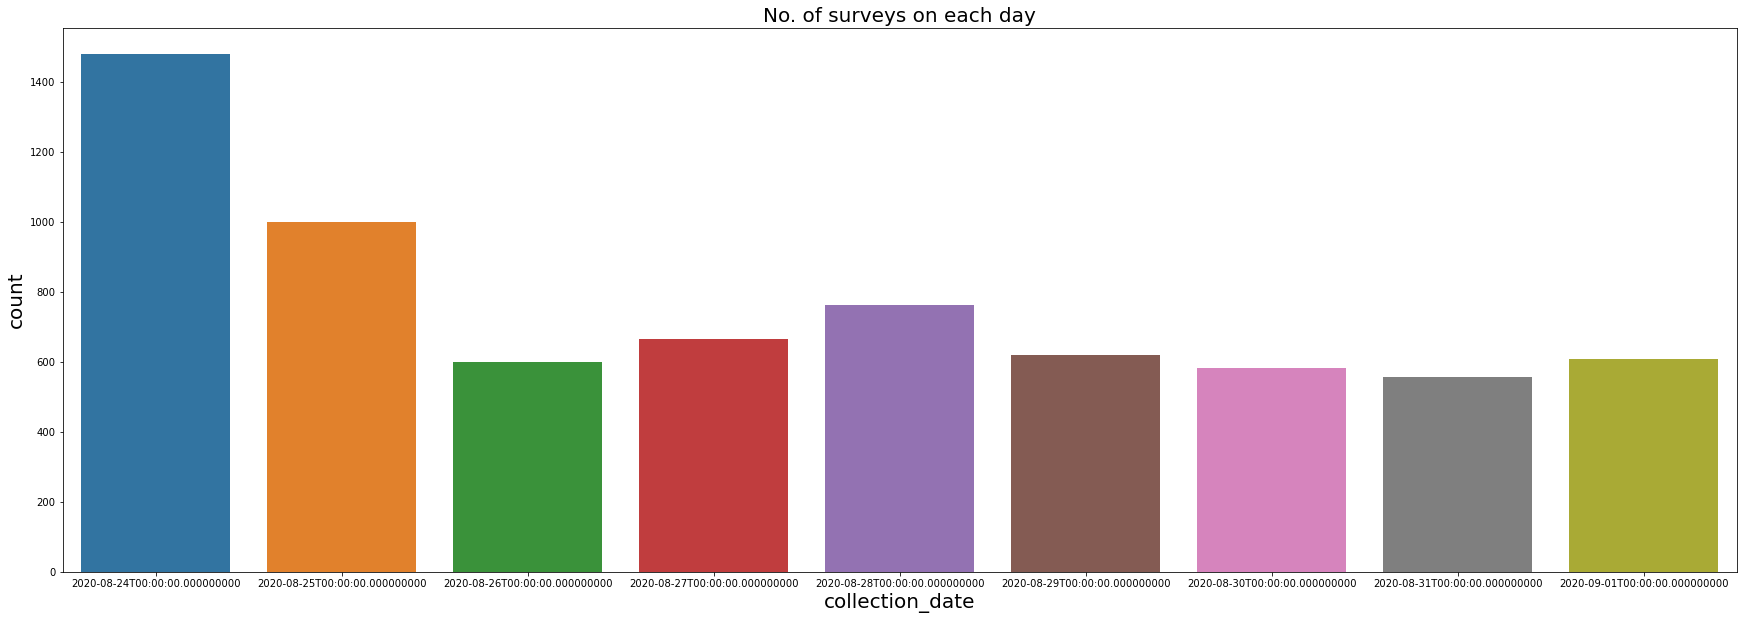

In [7]:
# let's check the surveys collected on each day by using countplot also.
plt.figure(figsize =(30,10))
pt=sns.countplot(x='collection_date',data=survey)
plt.xlabel("collection_date",fontsize=20)
plt.ylabel("count", fontsize=20)
pt.set_title("No. of surveys on each day", fontsize=20)



#### Here we can also see the no of surveys collected on each day in a plot..

### 3. What proportion of the total respondents were aged less than 45?

In [8]:
type('age')

str

In [9]:
survey['age'].replace('24ko',24,inplace=True)
survey['age']=survey['age'].astype('int')
print('There are {}% of people in survey less than age of 45.'.format(len(survey[survey["age"]<45])/ len(survey)*100))

There are 93.18479685452162% of people in survey less than age of 45.


### 4.Create a new column in the dataframe “age_group”. This column should contain the age group the respondent belongs to. The age groups are 18-25, 25-40, 40-55 and 55+.

In [10]:
ag1=list(range(18,26))
dict1=dict.fromkeys(ag1,'18-25')
ag2=list(range(25,41))
dict2=dict.fromkeys(ag2,'25-40')
ag3=list(range(40,56))
dict3=dict.fromkeys(ag3,'40-55')
ag4=list(range(56,100))
dict4=dict.fromkeys(ag4,'55+')
dict1.update(dict2)
dict1.update(dict3)
dict1.update(dict4)
survey['age_group']=survey['age'].map(dict1)
survey.head()

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight,age_group
0,1,2020-08-24,Rural,12th Pass,"₹ 30,000 - ₹ 50,000",BJP,BJP,Fully Dissatisfied,Fully Dissatisfied,26,Male,211,Gen,0.346969,25-40
1,2,2020-08-24,Rural,Graduate,"₹ 20,000 - ₹ 30,000",RLSP,JD(U),Somewhat Satisfied,Fully Dissatisfied,34,Male,189,BC,0.603419,25-40
2,3,2020-08-24,Rural,Graduate,"₹ 5,000 - ₹ 10,000",JAP(L),BJP,Fully Dissatisfied,Somewhat Satisfied,25,Male,191,Gen,0.673762,25-40
3,4,2020-08-24,Urban,Graduate,"₹ 10,000 - ₹ 20,000",RJD,RJD,Fully Dissatisfied,Somewhat Satisfied,36,Male,194,Gen,1.101298,25-40
4,5,2020-08-24,Rural,Graduate,"₹ 50,000 - ₹ 80,000",JD(U),Did not vote,Fully Satisfied,Fully Satisfied,22,Male,176,BC,0.333505,18-25


### 5. How many samples were collected for each age-group? Which age-group had the most samples.

In [11]:
survey['age_group'].value_counts()

25-40    3844
18-25    2094
40-55     821
55+       108
Name: age_group, dtype: int64

### 6.What proportion of the respondents had opted for the RJD party in both the Vote_Now and the Past_Vote questions.

In [12]:
Resp= len(survey[(survey['Vote_Now']=='RJD')  & (survey['Past_Vote']=='RJD')])/len(survey)

print('There are {} % of respondent had opted for RJD both in Vote_Now & Past_Vote'.format(Resp*100))

There are 11.810106305519149 % of respondent had opted for RJD both in Vote_Now & Past_Vote


### 7. For each day of sample collection, determine the proportion of respondents who were fully satisfied with the performance of the CM. So if there were a total of 1000 samples on day 1 and 300 out of those said they were fully satisfied, then our answer for that day would be 0.3.

In [13]:
survey.groupby(by='collection_date')[['CM_satisfaction']].apply(lambda x:np.sum(x=='Fully Satisfied')/len(x)*100)

,CM_satisfaction
collection_date,
2020-08-24,9.871535
2020-08-25,9.519038
2020-08-26,9.866221
2020-08-27,8.120301
2020-08-28,12.089356
2020-08-29,11.774194
2020-08-30,11.168385
2020-08-31,11.131059
2020-09-01,12.355848


### 8. In a similar fashion create a day-wise proportion of respondents that opted fully dissatisfied with their MLA. Create a line plot of the result with date on x-axis and proportions on the y-axis.

In [14]:
Ml=pd.DataFrame(survey.groupby(by='collection_date')[['MLA_satisfaction']].apply(lambda x:np.sum(x=='Fully Dissatisfied')/len(x)*100))
Ml

,MLA_satisfaction
collection_date,
2020-08-24,59.972955
2020-08-25,63.126253
2020-08-26,59.030100
2020-08-27,60.601504
2020-08-28,60.709593
2020-08-29,56.451613
2020-08-30,62.027491
2020-08-31,57.630162
2020-09-01,63.426689


<AxesSubplot:xlabel='collection_date'>

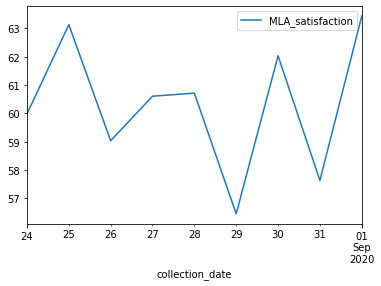

In [15]:
# let's create the line plot of the above output.
import datetime
Ml.index.date
Ml.plot()

### 9. Create a pivot-table (or crosstab) with index as Past_Vote, Column as Vote_Now and cell values as the count of samples

In [16]:
pt=pd.pivot_table(data=survey,index='Past_Vote',columns='Vote_Now',aggfunc='count',values='response_id')
pt

Vote_Now,AAP,AIMIM,BJP,BSP,HAM,INC,JAP(L),JD(U),LJP,Left Front,NOTA,Others,Plurals,RJD,RJJP,RLSP,Undecided,VIP
Past_Vote,,,,,,,,,,,,,,,,,,
BJP,7.0,1.0,1630.0,3.0,5.0,42.0,101.0,110.0,44.0,13.0,194.0,32.0,87.0,370.0,88.0,24.0,62.0,10.0
BSP,NaN,1.0,2.0,5.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Did not vote,8.0,5.0,231.0,2.0,1.0,22.0,41.0,69.0,10.0,16.0,83.0,11.0,51.0,195.0,20.0,3.0,31.0,5.0
HAM,2.0,NaN,25.0,NaN,1.0,NaN,3.0,2.0,2.0,NaN,4.0,NaN,NaN,6.0,4.0,NaN,1.0,NaN
INC,NaN,6.0,6.0,NaN,NaN,57.0,10.0,9.0,NaN,3.0,6.0,3.0,3.0,100.0,1.0,2.0,7.0,NaN
JAP(L),NaN,NaN,4.0,NaN,NaN,NaN,35.0,NaN,NaN,NaN,NaN,1.0,NaN,2.0,NaN,NaN,NaN,NaN
JD(U),6.0,10.0,254.0,2.0,2.0,45.0,72.0,279.0,29.0,9.0,90.0,18.0,43.0,435.0,13.0,25.0,36.0,6.0
LJP,NaN,NaN,76.0,1.0,NaN,4.0,3.0,6.0,9.0,2.0,3.0,NaN,2.0,17.0,1.0,NaN,1.0,NaN
Left Front,NaN,1.0,2.0,NaN,NaN,1.0,NaN,NaN,NaN,18.0,1.0,1.0,NaN,4.0,NaN,1.0,NaN,1.0


### 10.Repeat the above question with the cell values as the sum of “weight”.

In [17]:
pw=pd.pivot_table(data=survey,index='Past_Vote',columns='Vote_Now',aggfunc='sum',values='weight')
pw

Vote_Now,AAP,AIMIM,BJP,BSP,HAM,INC,JAP(L),JD(U),LJP,Left Front,NOTA,Others,Plurals,RJD,RJJP,RLSP,Undecided,VIP
Past_Vote,,,,,,,,,,,,,,,,,,
BJP,4.807335,0.349996,1049.344112,0.452551,10.171283,50.055502,63.832368,68.029581,45.716215,7.537394,114.913686,8.790137,50.016163,250.948101,16.047570,18.715113,41.286954,18.691691
BSP,NaN,1.654731,5.174487,32.010277,NaN,2.298223,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Did not vote,8.865896,5.379527,114.203906,3.329611,2.497170,27.791290,26.359190,58.983458,11.801813,13.050113,44.725179,7.289933,25.319524,173.882525,4.349832,5.041587,22.015457,10.696552
HAM,0.312607,NaN,25.348884,NaN,1.648856,NaN,0.712161,1.006719,2.496424,NaN,0.928984,NaN,NaN,7.713008,1.903148,NaN,0.039564,NaN
INC,NaN,11.105958,1.642875,NaN,NaN,161.742302,18.942597,11.077323,NaN,6.268726,5.999014,1.552038,1.588527,195.020050,5.340403,1.140299,8.558475,NaN
JAP(L),NaN,NaN,6.512846,NaN,NaN,NaN,57.876224,NaN,NaN,NaN,NaN,3.195682,NaN,2.164824,NaN,NaN,NaN,NaN
JD(U),12.457216,29.198610,156.243100,11.005903,2.639574,91.806261,106.217216,498.796862,33.148113,11.765603,61.109706,29.196072,45.175289,657.155514,4.015909,44.376194,58.137833,20.675288
LJP,NaN,NaN,85.010450,2.481377,NaN,21.613385,7.375946,11.382812,26.868529,1.712452,0.813171,NaN,1.927965,30.737989,0.478933,NaN,1.709409,NaN
Left Front,NaN,2.298223,0.209586,NaN,NaN,2.291368,NaN,NaN,NaN,44.280864,0.201455,8.309203,NaN,6.740281,NaN,0.877960,NaN,3.020887


### 11. Create a dataframe by performing a group by over age_group and calculate the count of total samples under each age_group.

In [18]:
ag=pd.DataFrame(survey.groupby(by='age_group')[['response_id']].agg('count'))
ag

,response_id
age_group,
18-25,2094
25-40,3844
40-55,821
55+,108


### 12. Create a dataframe by performing a group by over age_group and finding the count of total samples for each age_group that opted for the JD(U) party in Vote_Now.

In [19]:
JD=pd.DataFrame(survey.groupby(by='age_group')[['Vote_Now']].apply(lambda x:np.sum(x=='JD(U)')))
JD

,Vote_Now
age_group,
18-25,181
25-40,264
40-55,71
55+,10


### 13. Join/Merge the two dataframes from questions 12 and 11 with the common column as age_group.

In [20]:
df_ag=pd.merge(ag,JD,on='age_group')
df_ag

,response_id,Vote_Now
age_group,,
18-25,2094,181
25-40,3844,264
40-55,821,71
55+,108,10


#### Now we have a dataframe df_ag  containing output of question 11 and 12.

In [21]:
### Finished